# Logistic Regression From Scratch


## References


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification


## Dataset


In [2]:
n_features, n_samples = 10, 1000
x, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=0,
)
X = x.T
Y = y.reshape(-1, 1).T


## Metrics


### Cross-Entropy Loss

\begin{align*}
L(y, \hat{y}) = - [ y \times \log{\hat{y}} + (1 - y) \times \log{(1 - \hat{y})}]
\end{align*}


In [3]:

def loss(y, y_hat):
    return -((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat))).mean()




### Accuracy

\begin{align*}
\text{Accuracy } = \frac{1}{m} \sum_{i=0}^{m} I(y_i == \hat{y_i})
\end{align*}


In [4]:

def accuracy(y, y_hat, threshold=0.5):
    return np.int32(np.int32(y_hat > threshold) == y).sum() / y.shape[1]


## Activation Function


\begin{align*}
\text{Sigmoid } = \sigma{(x)} &= \frac{1}{1 + e^{-x}}\\
\\
\text{Derivative of Sigmoid } = \frac{\delta \sigma{(x)}}{\delta x} &= \frac{-1}{(1 + e^{-x})^2} . {- e^{-x}}\\
&= \frac{1}{1 + e^{-x}} . \frac{e^{-x}}{1 + e^{-x}}\\
&= \frac{1}{1 + e^{-x}} . \frac{1+e^{-x} - 1}{1 + e^{-x}}\\
\frac{\delta \sigma{(x)}}{\delta x} &= \sigma(x) . (1 - \sigma(x))
\end{align*}


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


## Architecture


```sh
        X ----------+
                    |               FORWARD PASS >>>>
                    V              
        w --------+>    z = w.X + b ----> a = sigmoid(z) ----> L(a, y) 
        <--dw--     A                                 
                    |     <+--dz--           <+--da--
        b ----------+               <<<<< BACKWARD PASS 
        <--db--
```

\begin{align*}
X &= (n \times m ) \\ 
Y &= (1 \times m ) = z \\
w &= (n \times 1 ) = dw\\
b &= (1 \times 1 ) = db\\
\end{align*}


In [6]:

X.shape, Y.shape


((10, 1000), (1, 1000))

### Forward Pass

\begin{align*}
z &= w^T . X + b \\
(1 \times m) &= (1 \times n) . (n \times m) + (1 \times 1) \\\\
a &= \sigma{(z)} \\
(1 \times m) &= (1 \times m)
\end{align*}


In [7]:

def forward(X, w, b):

    z = (w.T @ X) + b
    a = sigmoid(z)

    return a


### Backward Pass

\begin{align*}
L(y, a) &= - [ y \times \log{a} + (1 - y) \times \log{(1 - a)}] \\\\
da = \frac{\delta L}{\delta a} &= - \frac{y}{a} + \frac{1 - y}{1 - a} \\
(1 \times m) \\\\
dz = \frac{\delta L}{\delta z} &= \frac{\delta L}{\delta a} . \frac{\delta a}{\delta z} = da.\frac{\delta a}{\delta z} = -( \frac{y}{a} - \frac{1 - y}{1 - a} ) . (a(1-a)) = a - y \\
(1 \times m) \\\\
dw = \frac{\delta L}{\delta w} &= \frac{\delta L}{\delta z} . \frac{\delta z}{\delta w} = X. dz^T \\
(1 \times n) \\\\
db = \frac{\delta L}{\delta b} &= \frac{\delta L}{\delta z} . \frac{\delta z}{\delta b} = dz \\
(1 \times 1)
\end{align*}


In [8]:
def backward(X, Y, a):
    # da = -(Y / a) + ((1 - Y) / (1 - a))
    # dz = da * derivative_sigmoid(a)

    dz = a - y

    dw = np.mean(X @ dz.T, axis=1, keepdims=True)
    db = np.mean(dz, axis=1, keepdims=True)

    return dw, db


## Gradient Descent Algorithm


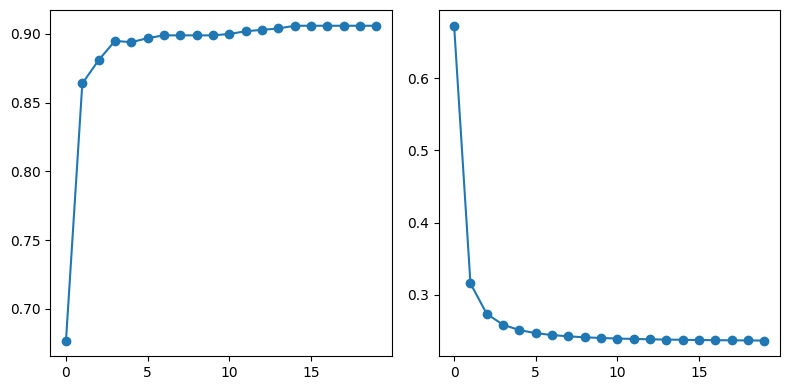

In [9]:

w = np.random.rand(n_features, 1)
b = np.random.rand(1, 1)

loss_history = []
accuracy_history = []
lr = 0.0001

for epoch in range(1000):

    y_hat = a = forward(X, w, b)
    dw, db = backward(X, Y, a)

    w = w - (lr * dw)
    b = b - (lr * db)

    if epoch % 50 == 0:

        prediction = forward(X, w, b)
        loss_val = loss(Y, prediction)
        accuracy_val = accuracy(Y, prediction)

        loss_history.append(loss_val)
        accuracy_history.append(accuracy_val)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(accuracy_history, "o-")
ax[1].plot(loss_history, "o-")

fig.tight_layout()
fig.show(warn=False)